In [1]:
import torch
import matplotlib.pyplot as plt

#### Data Creation

In [3]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#### Split data into training and test sets

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

#### Visualization of data

In [5]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.scatter(train_data, train_labels, c='b',label='Training Data')
    plt.scatter(test_data, test_labels, c='g',label= 'Test Data')
    if predictions is not None:
        plt.scatter(test_data,predictions, c='r',label= 'Predictions')
    plt.legend(prop={'size':14})

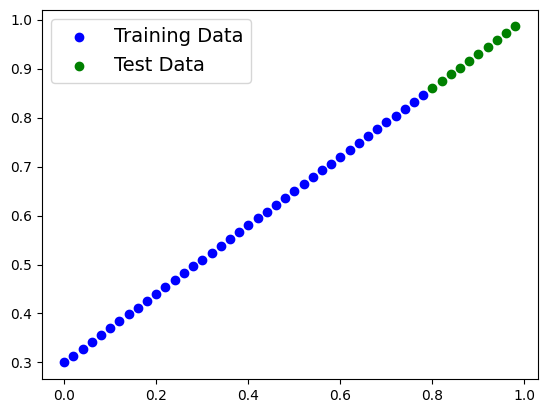

In [6]:
plot_predictions(X_train, y_train, X_test, y_test)

#### Building a Line Predictor (Linear Regression Model)

In [7]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.randn(1, dtype=torch.float), #random number initialization
                                          requires_grad=True) # gradient descent for update
        self.bias = torch.nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

#### Details of Pytorch Model

In [8]:
torch.manual_seed(42)
model = LinearRegressionModel()

list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Making Predictions

As the name suggests, torch.inference_mode() is used when using a model for inference (making predictions).

torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.

In older PyTorch code, you may also see torch.no_grad() being used for inference. While torch.inference_mode() and torch.no_grad() do similar things, torch.inference_mode() is newer, potentially faster and preferred.

In [10]:
with torch.inference_mode():
    y_preds = model(X_test)

In [11]:
len(y_preds)

10

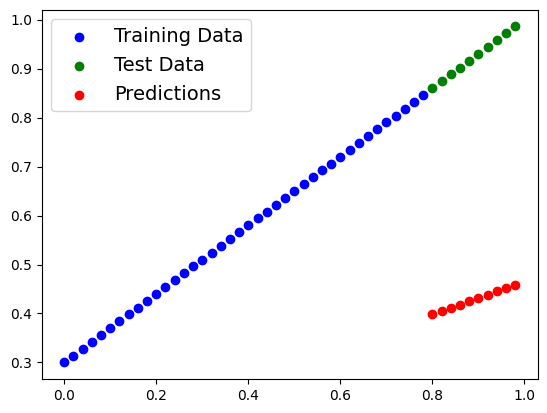

In [12]:
plot_predictions(X_train,y_train, X_test, y_test, y_preds)

#### **Training Model**

 *Creating a Loss Function and Optimizer*

 Loss Functions: calculates error

 Optimizer: Function for update of weights and biases to lower the losses


 torch.nn.L1Loss = Mean Absolute Error

 torch.optim.SGD(params, lr) = Stochastic Gradient Descent (optimizer)

 params is the target model parameters you'd like to optimize
  (e.g. the weights and bias values we randomly set before).

  lr is the hyperparamete, learning rate you'd like the optimizer to update the parameters at,

In [14]:
loss_function = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params= model.parameters(), lr = 0.01)

**Training Loop Steps**

- Forward Pass
    - The model goes through all of the training data once, performing its forward() function calculations.

- Calculate Loss
    - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.

- Zero Gradients
    - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.

- Perform Backpropagation Loss
    - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".

- Update the optimizer(gradient descent)
    - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.

**Testing Loop Steps**

- Forward Pass
    - The model goes through all of the training data once, performing its forward() function calculations.

- Calculate the loss
    - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.

- Calculate Evaluation Metrics
    - Alongisde the loss value you may want to calculate other evaluation metrics such as accuracy on the test set.

In [15]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    model.train() #Put model in training mode (this is the default state of a model)
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()

    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_function(test_pred, y_test.type(torch.float))

        if epoch %10 ==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch: {epoch} | Trainig Loss (MAE): {loss} | Test Loss (MAE): {test_loss}')

Epoch: 0 | Trainig Loss (MAE): 0.31288138031959534 | Test Loss (MAE): 0.48106518387794495
Epoch: 10 | Trainig Loss (MAE): 0.1976713240146637 | Test Loss (MAE): 0.3463551998138428
Epoch: 20 | Trainig Loss (MAE): 0.08908725529909134 | Test Loss (MAE): 0.21729660034179688
Epoch: 30 | Trainig Loss (MAE): 0.053148526698350906 | Test Loss (MAE): 0.14464017748832703
Epoch: 40 | Trainig Loss (MAE): 0.04543796554207802 | Test Loss (MAE): 0.11360953003168106
Epoch: 50 | Trainig Loss (MAE): 0.04167863354086876 | Test Loss (MAE): 0.09919948130846024
Epoch: 60 | Trainig Loss (MAE): 0.03818932920694351 | Test Loss (MAE): 0.08886633068323135
Epoch: 70 | Trainig Loss (MAE): 0.03476089984178543 | Test Loss (MAE): 0.0805937647819519
Epoch: 80 | Trainig Loss (MAE): 0.03132382780313492 | Test Loss (MAE): 0.07232122868299484
Epoch: 90 | Trainig Loss (MAE): 0.02788739837706089 | Test Loss (MAE): 0.06473556160926819


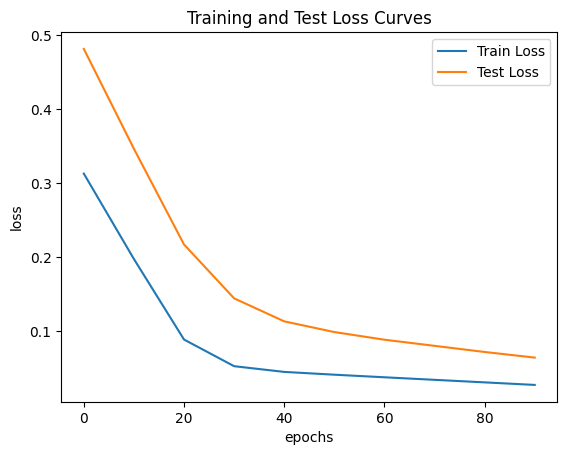

In [16]:
plt.plot(epoch_count, train_loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label = 'Test Loss')
plt.title('Training and Test Loss Curves')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [18]:
# current learned parameters of weights and biases
# dataset had values as weights = 0.7 and bias = 0.3
model.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

#### Making Predictions

In [19]:
model.eval() # set the model in evaluation mode

with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

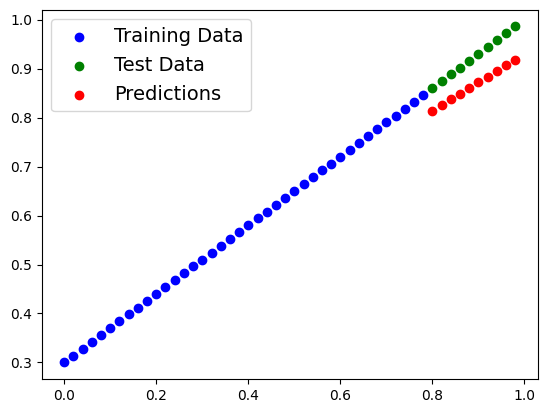

In [20]:
plot_predictions(X_train,y_train, X_test, y_test, y_preds)

#### Saving a Pytorch model

- torch.save
    - Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
- torch.load
    - Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
- torch.nn.Module.load_state_dict
    - Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's state_dict().

In [21]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = 'o1_pytorch_linear_regression.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(obj = model.state_dict(), #saving state_dict() i.e. learned parameters
           f = MODEL_SAVE_PATH
)

In [22]:
!ls -l models/o1_pytorch_linear_regression.pth


-rw-r--r-- 1 root root 1686 Jun  9 18:28 models/o1_pytorch_linear_regression.pth


#### Loading Model

we can now load it in using torch.nn.Module.load_state_dict(torch.load(f)) where f is the filepath of our saved model state_dict().

because we only saved the model's state_dict() which is a dictionary of learned parameters and not the entire model, we first have to load the state_dict() with torch.load() and then pass that state_dict() to a new instance of our model (which is a subclass of nn.Module).

In [23]:
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [24]:
loaded_model.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

In [25]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])